### Apartado -01

#### 2.1.	Gráficos de polaridad y subjetividad con TextBlob.

 Paso 1: Cargar el dataset

In [ ]:
# Cargamos el dataset directamente desde Kaggle, tambien se puede hacer por medio de un CSV
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")

# Mostrar las primeras filas para inspección
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df_sample = df[['Text', 'Score']].sample(n=10000, random_state=42)  # carga una muestra de 10,000 reseñas
df_sample.head()

,Text,Score
165256,Having tried a couple of other brands of glute...,5
231465,My cat loves these treats. If ever I can't fin...,5
427827,A little less than I expected. It tends to ha...,3
433954,"First there was Frosted Mini-Wheats, in origin...",2
70260,and I want to congratulate the graphic artist ...,5


Paso 2: Calcular polaridad y subjetividad con TextBlob

In [ ]:
from textblob import TextBlob

df_sample["polaridad"] = df_sample["Text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_sample["subjetividad"] = df_sample["Text"].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
df_sample.head()

,Text,Score,polaridad,subjetividad
165256,Having tried a couple of other brands of glute...,5,0.319318,0.538636
231465,My cat loves these treats. If ever I can't fin...,5,0.435370,0.616667
427827,A little less than I expected. It tends to ha...,3,-0.010833,0.473333
433954,"First there was Frosted Mini-Wheats, in origin...",2,0.159401,0.472750
70260,and I want to congratulate the graphic artist ...,5,0.235565,0.530878


Visualizaciones

1. Distribución general de polaridad

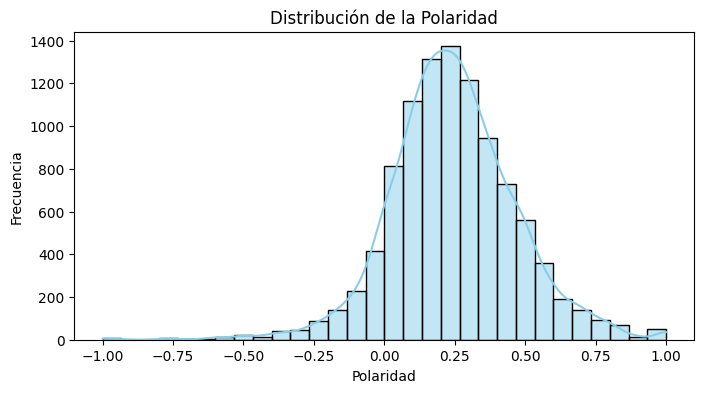

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df_sample["polaridad"], bins=30, kde=True, color="skyblue")
plt.title("Distribución de la Polaridad")
plt.xlabel("Polaridad")
plt.ylabel("Frecuencia")
plt.show()

1.1 Distribución general de subjetividad

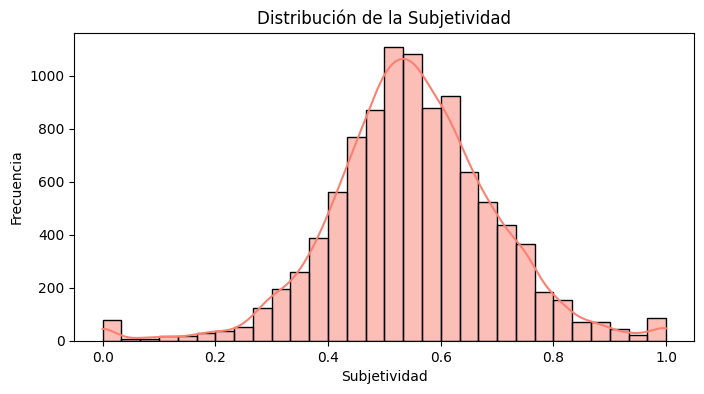

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_sample["subjetividad"], bins=30, kde=True, color="salmon")
plt.title("Distribución de la Subjetividad")
plt.xlabel("Subjetividad")
plt.ylabel("Frecuencia")
plt.show()

2. Dispersión de polaridad vs subjetividad

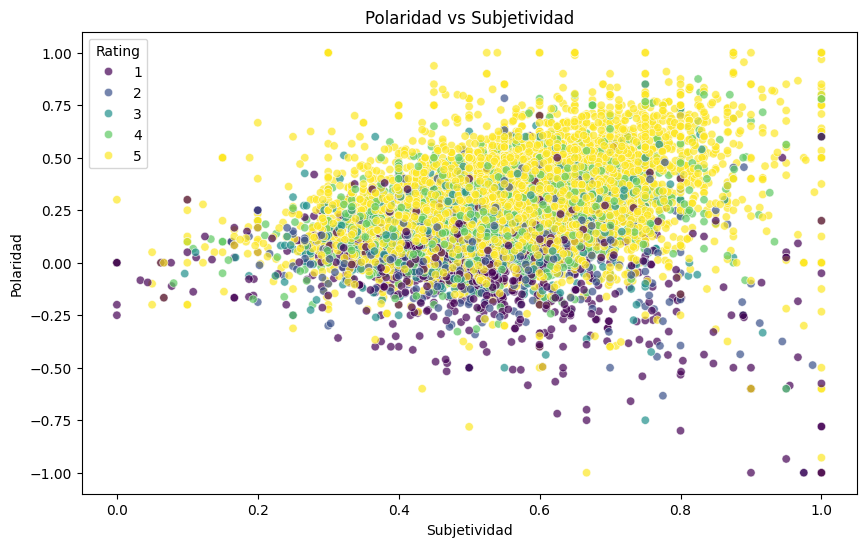

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="subjetividad", y="polaridad", hue="Score", data=df_sample, palette="viridis", alpha=0.7)
plt.title("Polaridad vs Subjetividad")
plt.xlabel("Subjetividad")
plt.ylabel("Polaridad")
plt.legend(title="Rating")
plt.show()

3. Nube de palabras para opiniones positivas y negativas

3.1 Opiniones Positivas

Text(0.5, 1.0, 'Opiniones Positivas')

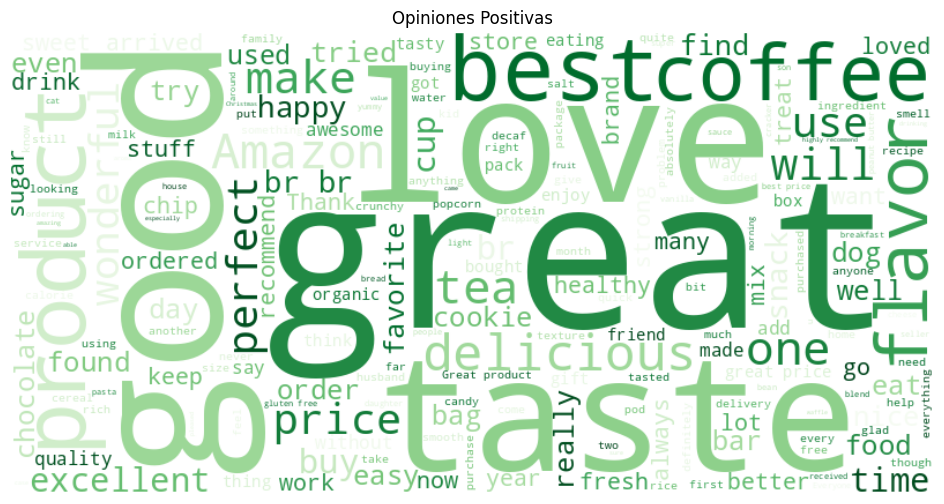

In [ ]:
from wordcloud import WordCloud

# Filtrar opiniones positivas y negativas
positivas = " ".join(df_sample[df_sample["polaridad"] > 0.5]["Text"].dropna().astype(str))
negativas = " ".join(df_sample[df_sample["polaridad"] < -0.5]["Text"].dropna().astype(str))

# Generar nubes
wordcloud_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positivas)
wordcloud_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negativas)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Opiniones Positivas")

3.2 Opiniones Negativas

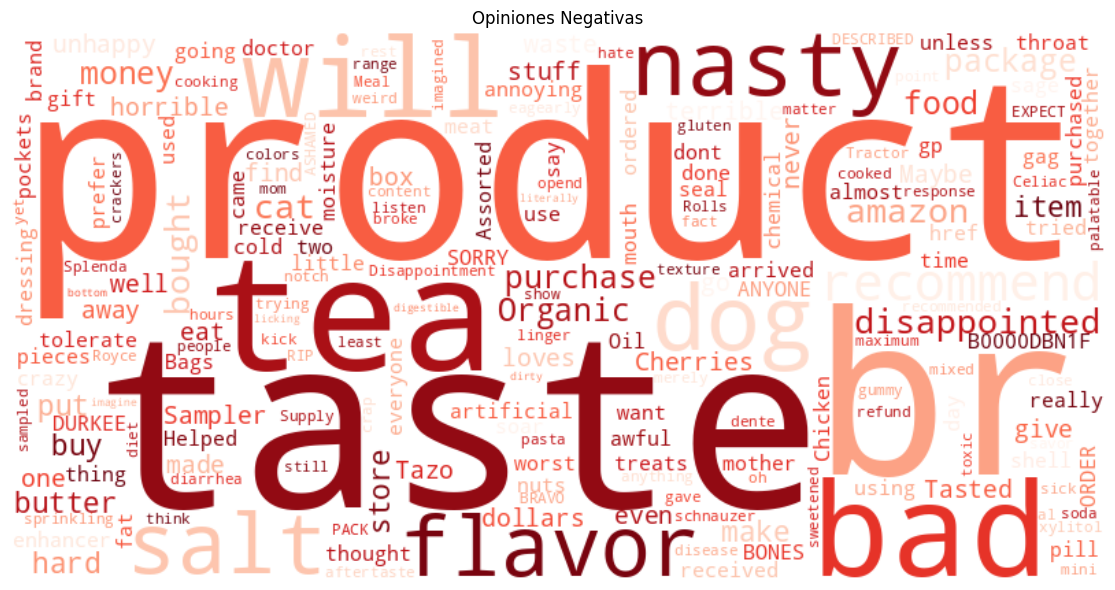

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Opiniones Negativas")

plt.tight_layout()
plt.show()

4. Gráfico circular de distribución de sentimientos

Clasificación de sentimientos según polaridad

In [ ]:
def clasificar_sentimiento(p):
    if p > 0.1:
        return "Positiva"
    elif p < -0.1:
        return "Negativa"
    else:
        return "Neutra"

df_sample["sentimiento"] = df_sample["polaridad"].apply(clasificar_sentimiento)
df_sample.head()

,Text,Score,polaridad,subjetividad,sentimiento
165256,Having tried a couple of other brands of glute...,5,0.319318,0.538636,Positiva
231465,My cat loves these treats. If ever I can't fin...,5,0.435370,0.616667,Positiva
427827,A little less than I expected. It tends to ha...,3,-0.010833,0.473333,Neutra
433954,"First there was Frosted Mini-Wheats, in origin...",2,0.159401,0.472750,Positiva
70260,and I want to congratulate the graphic artist ...,5,0.235565,0.530878,Positiva


Crear el gráfico circular

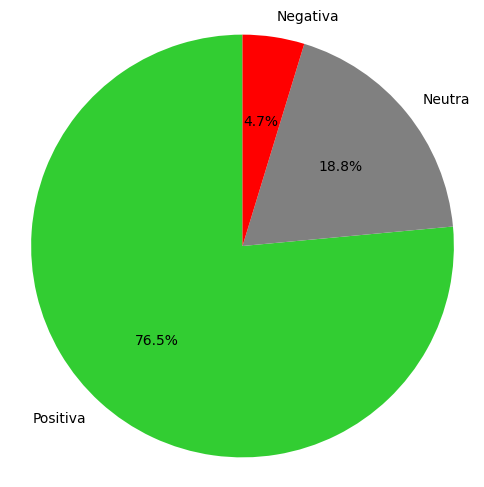

In [ ]:
import matplotlib.pyplot as plt

conteo = df_sample["sentimiento"].value_counts()
etiquetas = conteo.index
valores = conteo.values
colores = ["limegreen", "gray", "red"]

plt.figure(figsize=(6,6))
plt.pie(valores, labels=etiquetas, autopct="%1.1f%%", colors=colores, startangle=90)
plt.axis("equal")  # Para que sea un círculo perfecto
plt.show()

#### 2.2.	Visualización de scores con modelos Transformers (BERT, RoBERTa)

Paso 1: Autenticación

In [ ]:
from google.colab import userdata
tu_token_de_huggingface = userdata.get('tu_token_de_huggingface')

In [ ]:
from huggingface_hub import login

# Coloca tu token aquí (puedes usar input() si lo prefieres)
login(tu_token_de_huggingface)

Paso 2: Instalación de librerías necesarias

In [ ]:
!pip install transformers datasets torch

Paso 3: Cargar y preparar los datos

Cargar dataset

Enlace del dataset: https://huggingface.co/datasets/beltrewilton/punta-cana-spanish-reviews

In [ ]:
import pandas as pd

# Cargar una muestra del dataset en español
df = pd.read_csv("hf://datasets/beltrewilton/punta-cana-spanish-reviews/punta_cana.csv")

# Seleccionamos solo las columnas relevantes
df = df[["review_text", "rating"]].dropna()

# Vista preliminar
df.head()

,review_text,rating
0,El hotel impecable todo muy limpio las habitac...,5
1,"EXCELENTE, magnífico, excepcional, maravilloso...",5
2,Tras conocer bastantes hoteles en distintos lu...,5
3,Muy buen hotel. Cumple con todos los requisito...,5
4,Excelente todo ....sobre todo el personal. Es ...,5


In [ ]:
df.loc[0, "review_text"]

'El hotel impecable todo muy limpio las habitaciones amplias y con todo tipo de detalles. Las medidas cocid estaban bien ya que en el bufete tú no tocas nada todo te lo sirven ellos . En la piscina y en la playa hay muchísimos camareros muy atentos , en especial Fidelina( es la bomba) que te sirven continuamente y te desinfectan las manos antes de coger la bebida.Los restaurantes , la barbacoa de la playa con la paella y el bufete de diez, no puedes decir que algo está malo.Todo el personal es súper amable y divertido.Nuestro mayordomo Gerlyn, un diez . Lo mejor LA DIVA, que junto a sus compañeros Mr Blue,cherry etc.. hacen que te diviertas y te lo pases genial .La playa muy bonita.'

In [ ]:
df.shape

(34561, 2)

Eliminación de la columna rating como target

In [ ]:
# Guardamos 'rating' solo como referencia para análisis posterior
# Pero no lo usaremos como etiqueta para entrenar ni clasificar
rating_referencia = df["rating"]

# Eliminamos la columna del DataFrame principal
df = df.drop(columns=["rating"])
df.head()

,review_text
0,El hotel impecable todo muy limpio las habitac...
1,"EXCELENTE, magnífico, excepcional, maravilloso..."
2,Tras conocer bastantes hoteles en distintos lu...
3,Muy buen hotel. Cumple con todos los requisito...
4,Excelente todo ....sobre todo el personal. Es ...


Paso 4: Clasificación de sentimiento con Transformers

Cargar el modelo de Hugging Face: nlptown/bert-base-multilingual-uncased-sentiment

Modelo: https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

In [ ]:
from transformers import pipeline

# Crear pipeline de análisis de sentimiento con el modelo BERT multilingüe
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

Device set to use cpu


Aplicar el modelo a nuestras opiniones

In [ ]:
# Aplicamos el modelo a cada reseña

# Limitamos a 1.000 reviews | Opcional para el estudiante
df = df.sample(n=1000, random_state=42)

# Nota: Limitamos el texto a los primeros 512 tokens, que es el máximo que BERT puede manejar directamente.
df["resultado"] = df["review_text"].apply(lambda x: classifier(x[:512])[0])
df.head()

,review_text,resultado
14233,"Fui de luna de miel, y me encantooooo, el serv...","{'label': '5 stars', 'score': 0.8846086859703064}"
15230,Servicios excelentes Mayordomo Felipe Moral 1-...,"{'label': '5 stars', 'score': 0.7285045981407166}"
13852,"El check in fue excelente, los muchachos de gu...","{'label': '4 stars', 'score': 0.5209087133407593}"
31994,"Vine con una amiga y la pasamos increíble , la...","{'label': '5 stars', 'score': 0.7716962695121765}"
23784,Tuvimos mala experencia con el proceso de chec...,"{'label': '2 stars', 'score': 0.5578134655952454}"


Extraer columnas útiles

In [ ]:
df["predicted_rating"] = df["resultado"].apply(lambda x: int(x["label"][0]))
df["confidence"] = df["resultado"].apply(lambda x: round(x["score"], 2))
df.head()

,review_text,resultado,predicted_rating,confidence
14233,"Fui de luna de miel, y me encantooooo, el serv...","{'label': '5 stars', 'score': 0.8846086859703064}",5,0.88
15230,Servicios excelentes Mayordomo Felipe Moral 1-...,"{'label': '5 stars', 'score': 0.7285045981407166}",5,0.73
13852,"El check in fue excelente, los muchachos de gu...","{'label': '4 stars', 'score': 0.5209087133407593}",4,0.52
31994,"Vine con una amiga y la pasamos increíble , la...","{'label': '5 stars', 'score': 0.7716962695121765}",5,0.77
23784,Tuvimos mala experencia con el proceso de chec...,"{'label': '2 stars', 'score': 0.5578134655952454}",2,0.56


Paso 5: Visualización de resultados

Distribución de calificaciones predichas

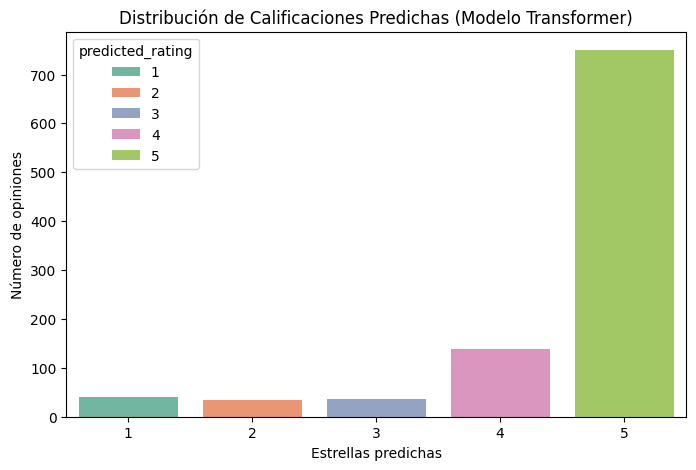

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x="predicted_rating", data=df, hue="predicted_rating", palette="Set2")
plt.title("Distribución de Calificaciones Predichas (Modelo Transformer)")
plt.xlabel("Estrellas predichas")
plt.ylabel("Número de opiniones")
plt.show()

In [ ]:
df['predicted_rating'].value_counts()

,count
predicted_rating,
5,750
4,138
1,41
3,36
2,35


Imprimiendo reviews aleatorias

Comentario 5 estrellas:

In [ ]:
df[df['predicted_rating']==5].reset_index().loc[0,'review_text']

'Fui de luna de miel, y me encantooooo, el servicio y las atenciones fueron las mejores, quedamos con gusto de regresar, nos sentimos muy a gusto con los servicios, de Bilmadry, Jorgely y Andres, muy encantada.'

Comentario 4 estrellas

In [ ]:
df[df['predicted_rating']==4].reset_index().loc[0,'review_text']

'El check in fue excelente, los muchachos de guest servir fueron atento, el servicio de los restaurantes fueron muy bueno, la limpieza de las habitaciones fue impecable. Federico, Emilio y Grave fueron bien amable. Realmente lo recomiendo y volveré. Lamentamos un poco las algas de la playa.'

Comentario 3 estrellas

In [ ]:
df[df['predicted_rating']==3].reset_index().loc[0,'review_text']

'todo increible y muy padre. pero de la llegada del equipaje a mi habitacion se perdieron 3 playeras y 1 cinturon de mi esposo. no supieron resolver porque hay 1 punto ciego en el hotel de seguro. no quisimos hacer mas, pero si reportamos. el personal atento lo demas muy bien'

Comentario 2 estrellas

In [ ]:
df[df['predicted_rating']==2].reset_index().loc[0,'review_text']

'Tuvimos mala experencia con el proceso de check in y sobre situaciones que se veian en el hotel con respecto al comportamiento de los huespedes (uso de bocinas, hookah, mujeres bailando regatton en la piscina). La comida de los buffets de mala calidad.'

Comentario 1 estrellas

In [ ]:
df[df['predicted_rating']==1].reset_index().loc[0,'review_text']

'Estuve en Barceló Palace Deluxe 21 noche hice una serie de reclamaciones y aún no la he visto publicada espero verlas publicadas sino no nos hagan perder el tiempo escribiendo para que nos Maren con propaganda'

2. Histograma de confianza del modelo

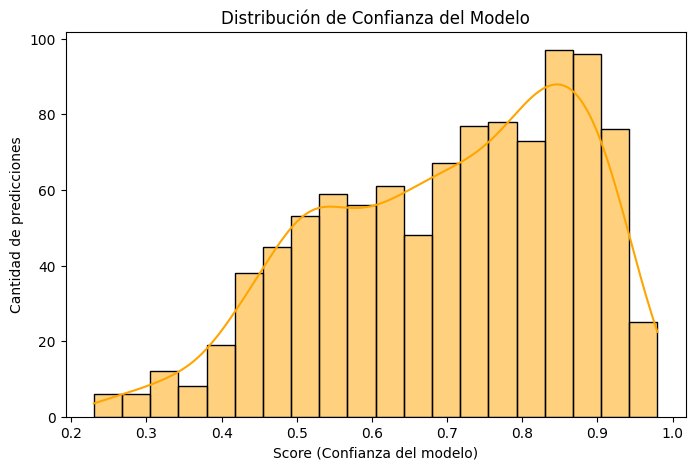

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["confidence"], bins=20, color="orange", kde=True)
plt.title("Distribución de Confianza del Modelo")
plt.xlabel("Score (Confianza del modelo)")
plt.ylabel("Cantidad de predicciones")
plt.show()

3. Comparación entre estrellas reales y predichas. Gráfico de barras comparativas.

1. Construir las frecuencias por estrella

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Creamos tabla de contingencia (frecuencia cruzada)
df_comparacion = df.copy()
df_comparacion["estrellas_reales"] = rating_referencia

# Contar número de reseñas por cada estrella (real y predicha)
reales = df_comparacion["estrellas_reales"].value_counts().sort_index()
predichas = df_comparacion["predicted_rating"].value_counts().sort_index()

# Unificar en un solo DataFrame para graficar
df_barras = pd.DataFrame({
    "Estrella": reales.index,
    "Reales": reales.values,
    "Predichas": predichas.reindex(reales.index, fill_value=0).values
})

2. Crear gráfico de barras lado a lado

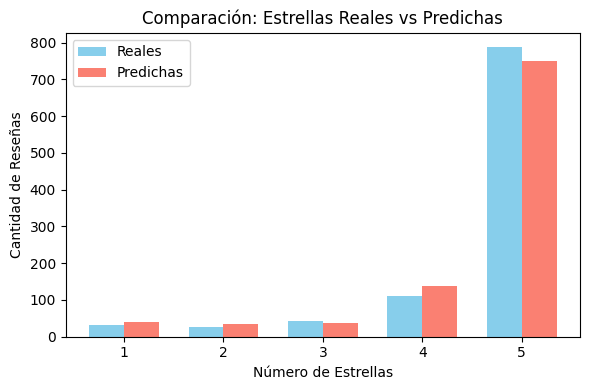

In [ ]:
import numpy as np

# Posiciones para las barras
x = np.arange(len(df_barras["Estrella"]))  # [0, 1, 2, 3, 4]
ancho = 0.35  # Ancho de cada barra

plt.figure(figsize=(6,4))
plt.bar(x - ancho/2, df_barras["Reales"], width=ancho, label="Reales", color="skyblue")
plt.bar(x + ancho/2, df_barras["Predichas"], width=ancho, label="Predichas", color="salmon")

plt.xticks(x, df_barras["Estrella"])
plt.xlabel("Número de Estrellas")
plt.ylabel("Cantidad de Reseñas")
plt.title("Comparación: Estrellas Reales vs Predichas")
plt.legend()
plt.tight_layout()
plt.show()

#### 2.3.	Interpretación de outputs generativos (resúmenes o respuestas) como nubes de palabras.

Paso 1: Autenticación

In [ ]:
from google.colab import userdata
tu_token_de_huggingface = userdata.get('tu_token_de_huggingface')

In [ ]:
from huggingface_hub import login

# Coloca tu token aquí (puedes usar input() si lo prefieres)
login(tu_token_de_huggingface)

Paso 2: Instalar dependencias

In [ ]:
!pip install transformers sentencepiece

Paso 3: Cargar y preparar los datos

Cargar dataset

Enlace del dataset: https://huggingface.co/datasets/beltrewilton/punta-cana-spanish-reviews

In [ ]:
import pandas as pd

# Cargar una muestra del dataset en español
df = pd.read_csv("hf://datasets/beltrewilton/punta-cana-spanish-reviews/punta_cana.csv")

# Seleccionamos solo las columnas relevantes
df = df[["review_text", "rating"]].dropna()

# Vista preliminar
df.head()

,review_text,rating
0,El hotel impecable todo muy limpio las habitac...,5
1,"EXCELENTE, magnífico, excepcional, maravilloso...",5
2,Tras conocer bastantes hoteles en distintos lu...,5
3,Muy buen hotel. Cumple con todos los requisito...,5
4,Excelente todo ....sobre todo el personal. Es ...,5


Paso 4: Preparar el modelo

Enlace modelo: https://huggingface.co/google/flan-t5-small

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

# Cargar modelo y tokenizer
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")
modelo = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

Paso 5: Generar resumen automático

In [ ]:
# Concatenar opiniones seleccionadas como entrada del modelo
texto_entrada = " ".join(df["review_text"].sample(100).tolist())

# Agregar instrucción (T5 requiere una indicación clara)
entrada = "resumir: " + texto_entrada

# Tokenizar y preparar para el modelo
inputs = tokenizer(entrada, return_tensors="pt", max_length=512, truncation=True)

# Generar resumen
resumen_ids = modelo.generate(inputs["input_ids"], max_length=100, num_beams=4, early_stopping=True)
resumen = tokenizer.decode(resumen_ids[0], skip_special_tokens=True)

In [ ]:
print("Resumen generado:")
resumen

Resumen generado:


'EL RESTO EXCELENTE muy bueno la comida en los resto, la atención en el lobby con respecto a la limpieza de la habitación todo muy correcto y el personal muy bueno Hotel ideal para ir con chicos El Mini Club me resultó muy bueno....mi hija volvió fascinada'

Paso 6: Visualizar el resumen como nube de palabras

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar nube de palabras del resumen
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(resumen)

# Visualizar
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras del Resumen Generado")
plt.show()

Análisis comentarios negativos

In [ ]:
# Concatenar opiniones seleccionadas como entrada del modelo
df_comentarios_negativos = df[df['rating']==1]
texto_entrada = " ".join(df_comentarios_negativos["review_text"].sample(100).tolist())

# Agregar instrucción (T5 requiere una indicación clara)
entrada = "resumir: " + texto_entrada

# Tokenizar y preparar para el modelo
inputs = tokenizer(entrada, return_tensors="pt", max_length=512, truncation=True)

# Generar resumen
resumen_ids = modelo.generate(inputs["input_ids"], max_length=100, num_beams=4, early_stopping=True)
resumen = tokenizer.decode(resumen_ids[0], skip_special_tokens=True)

In [ ]:
print("Resumen generado:")
resumen

Resumen generado:


'El personal de seguridad me falta el respeto en el ingreso en caseta de seguridad. Me grito y me dejo esperando 2 horas bajo el rayo del sol en lo que la gerencia decida si me iban a aceptar el ingreso con un DAY PASS'

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar nube de palabras del resumen
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(resumen)

# Visualizar
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras del Resumen Generado")
plt.show()

### Apartado -03

#### 3.1.	Implementación en Google Colab con librerías con Plotly, Seaborn y WordCloud

Paso 1: Autenticación

In [ ]:
from google.colab import userdata
tu_token_de_huggingface = userdata.get('tu_token_de_huggingface')

In [ ]:
from huggingface_hub import login

# Coloca tu token aquí (puedes usar input() si lo prefieres)
login(tu_token_de_huggingface)

Paso 2: Instalación de dependencias

In [ ]:
!pip install -q transformers datasets plotly wordcloud seaborn

Paso 3: Importación de librerías

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import torch

Paso 4: Cagar dataset

In [ ]:
import pandas as pd

# Cargar una muestra del dataset en español
df = pd.read_csv("hf://datasets/beltrewilton/punta-cana-spanish-reviews/punta_cana.csv")

# Vista preliminar
df.head()

In [9]:
df.shape

(1000, 4)

Paso 5: Limpieza y preparación

In [3]:
# Nos quedamos solo con las columnas necesarias
df = df[["review_text", "rating"]].dropna()
df = df[df["review_text"].str.len() > 20]  # Filtrar comentarios muy cortos

# Eliminar columna 'stars' porque haremos predicción con el modelo
df = df.sample(1000).reset_index(drop=True)  # Selección de muestra para rapidez
df.drop(columns=["rating"], inplace=True)

# Vista preliminar
df.head()

,review_text
0,Estuvimos con mi familia del 10 al 18 de Novie...
1,"Hemos estado hospedados hace unos días, hotel ..."
2,"Un hotel impresionante, especialmente cogiendo..."
3,"""Es un hotel de lujo con habitaciones acogedor..."
4,"Volveremos pronto, sin duda!! La tranquilidad ..."


Paso 6: Cargar modelo Transformers

In [ ]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
classifier = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)

Paso 7: Predicción de sentimientos

In [5]:
df["pred"] = df["review_text"].apply(lambda x: classifier(x)[0]["label"])
df["stars_pred"] = df["pred"].str.extract(r"(\d)").astype(int)

# Vista preliminar
df.head()

,review_text,pred,stars_pred
0,Estuvimos con mi familia del 10 al 18 de Novie...,5 stars,5
1,"Hemos estado hospedados hace unos días, hotel ...",5 stars,5
2,"Un hotel impresionante, especialmente cogiendo...",4 stars,4
3,"""Es un hotel de lujo con habitaciones acogedor...",5 stars,5
4,"Volveremos pronto, sin duda!! La tranquilidad ...",5 stars,5


Paso 8: Clasificación simplificada

In [6]:
def categorize_sentiment(score):
    if score <= 2:
        return "Negativo"
    elif score == 3:
        return "Neutro"
    else:
        return "Positivo"

df["sentimiento"] = df["stars_pred"].apply(categorize_sentiment)

# Vista preliminar
df.head()

,review_text,pred,stars_pred,sentimiento
0,Estuvimos con mi familia del 10 al 18 de Novie...,5 stars,5,Positivo
1,"Hemos estado hospedados hace unos días, hotel ...",5 stars,5,Positivo
2,"Un hotel impresionante, especialmente cogiendo...",4 stars,4,Positivo
3,"""Es un hotel de lujo con habitaciones acogedor...",5 stars,5,Positivo
4,"Volveremos pronto, sin duda!! La tranquilidad ...",5 stars,5,Positivo


Paso 9: Métricas resumen iniciales

In [7]:
resumen = df["sentimiento"].value_counts().reset_index()
resumen.columns = ["Sentimiento", "Cantidad"]

# Vista preliminar
resumen.head()

,Sentimiento,Cantidad
0,Positivo,874
1,Negativo,83
2,Neutro,43


Paso 10: Ejemplo visualización interactiva con Plotly

In [ ]:
fig = px.pie(resumen, values="Cantidad", names="Sentimiento",
             title="Distribución de Sentimientos Predichos (Transformers)",
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

Paso 11: Ejemplo visualización interactiva nueve de palabras por sentimiento

In [ ]:
from wordcloud import STOPWORDS

# Crear función de nube
def generar_nube(textos, color='black'):
    texto_concatenado = " ".join(textos)
    wc = WordCloud(background_color="white",
                   stopwords=STOPWORDS,
                   colormap=color,
                   width=800, height=400).generate(texto_concatenado)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Comentarios positivos
positivos = df[df["sentimiento"] == "Positivo"]["review_text"]
print("🔵 Nube de Palabras - Opiniones Positivas")
generar_nube(positivos, color='Blues')

# Comentarios negativos
negativos = df[df["sentimiento"] == "Negativo"]["review_text"]
print("🔴 Nube de Palabras - Opiniones Negativas")
generar_nube(negativos, color='Reds')